# **INVOCACIONES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as snb
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATASET**

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cause_of_deaths.csv')
#Este csv tiene mas de 4000 rows, lo voy a limitar a los estandares de entrega.
data.head(2001)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Georgia,GEO,2006,33,1408,307,2,1,82,200,...,962,665,28,1,622,1380,1560,1941,168,8
1997,Georgia,GEO,2007,33,1391,292,3,1,87,186,...,973,672,29,1,630,1337,1526,1903,162,9
1998,Georgia,GEO,2008,34,1419,293,3,1,96,182,...,1045,681,29,1,698,1317,1561,1972,163,9
1999,Georgia,GEO,2009,34,1477,306,3,0,101,143,...,1119,724,30,1,743,1351,1584,2032,159,10


# *Graficos Generales*

**Busquemos la mayor causa de muerte**

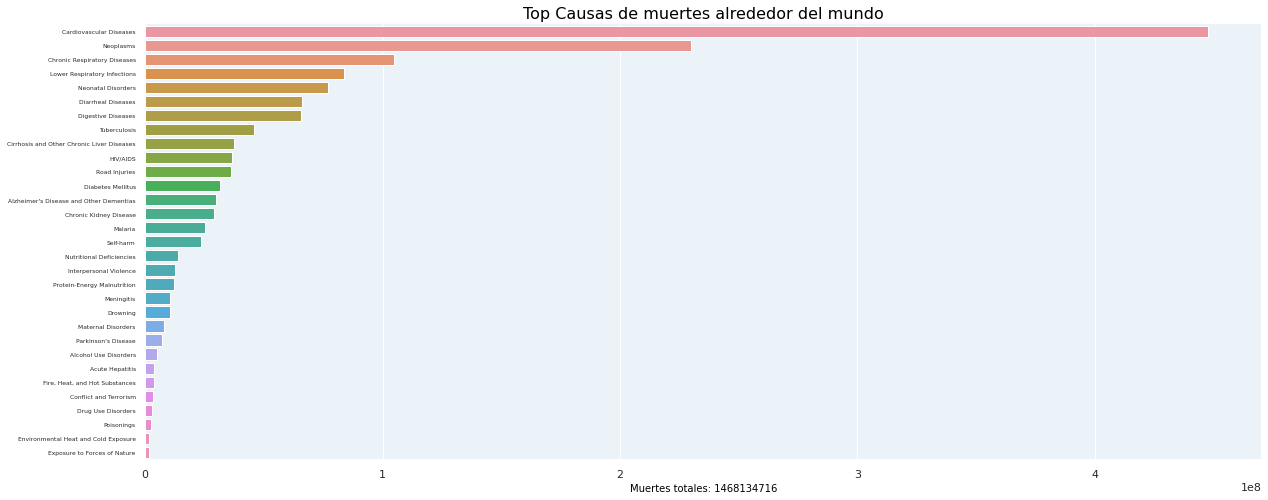

In [ ]:
#Limpiamos el DS.
totalesdiarios = data.drop(['Country/Territory','Code', 'Year'], axis=1).sum()
totales_diarios = totalesdiarios.sort_values(ascending=False)

#Creamos el Grafico.
snb.set(rc={"axes.facecolor":"#ebf3f9","figure.facecolor":"#FFFFFF"})
plt.subplots(figsize=(20,8))
snb.barplot(x=totales_diarios.values, y=totales_diarios.index)

#Titulo del Grafico.
plt.title('Top Causas de muertes alrededor del mundo', fontsize=16, color='black')

# Creamos un Footer
plt.xlabel(f'Muertes totales: {totalesdiarios.values.sum()}', fontsize=10, color='black')


#Adaptamos los ticks del grafico para que se vean mejor.
for causa in plt.gca().get_yticklabels():
    causa.set_fontsize(6)
    causa.set_horizontalalignment('right')

snb.despine(left=True, bottom=True)



Teniendo en cuenta que la mayor causa de muerte desde 1990 a nivel mundial fueron las enfermedades cardiovasculares, intente buscar como se fue desarrollando durante los años.

**Como fue evolucionando durante los años**

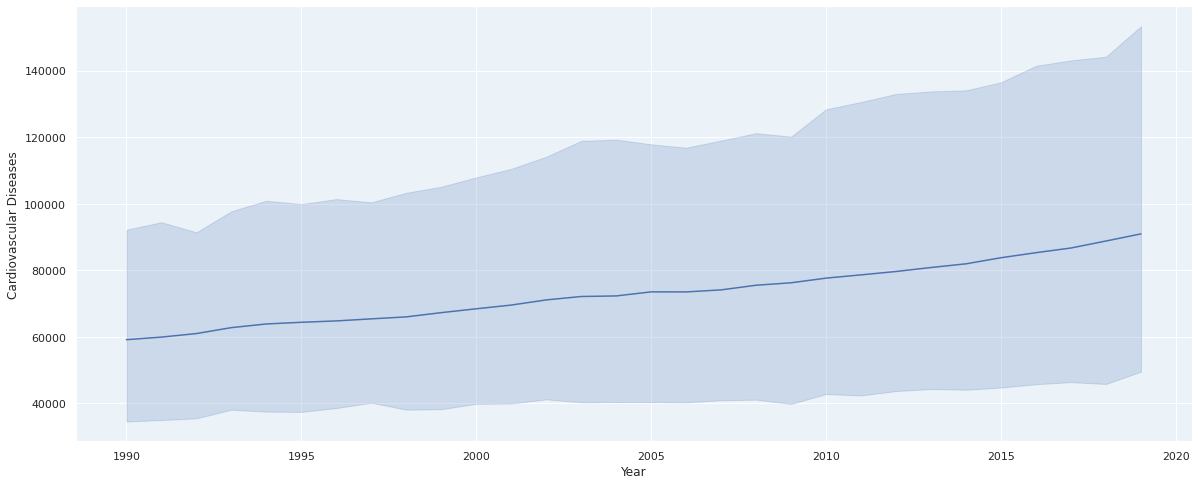

In [ ]:
#Creacion del Grafico
plt.subplots(figsize=(20,8))
snb.lineplot(data=data,y='Cardiovascular Diseases', x='Year')

a diferecia de lo que se podria esperar, el numero siguio evolucionando conforme fueron pasando los años.


*Mayor cantidad de muertes desde 1990.*

Country/Territory
China            100505973
India             52994710
Russia            33903781
United States     26438346
Indonesia         13587011
Ukraine           13053052
Germany           10819770
Brazil             9589019
Japan              9210437
Pakistan           7745192
Name: Cardiovascular Diseases, dtype: int64

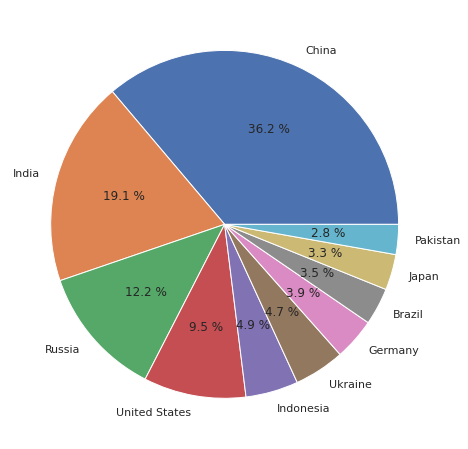

In [ ]:
#Filtramos por mayor cantidad de muertes
max_Death= data[data['Cardiovascular Diseases'] > 40000]
#Agrupamos por nombre y sumamos los resultados
max_Death = max_Death.groupby('Country/Territory').sum('Cardiovascular Diseases')
#Creamos la variable
total_Deaths = max_Death['Cardiovascular Diseases'].sort_values(ascending=False)[:10]

#Definimos y creamos el grafico
plt.subplots(figsize=(20,8))
plt.pie(total_Deaths, labels=total_Deaths.index, autopct="%0.1f %%")
total_Deaths

otra manera de visualizar los datos serian:


Text(0.5, 0, 'Muertes totales:277847291')

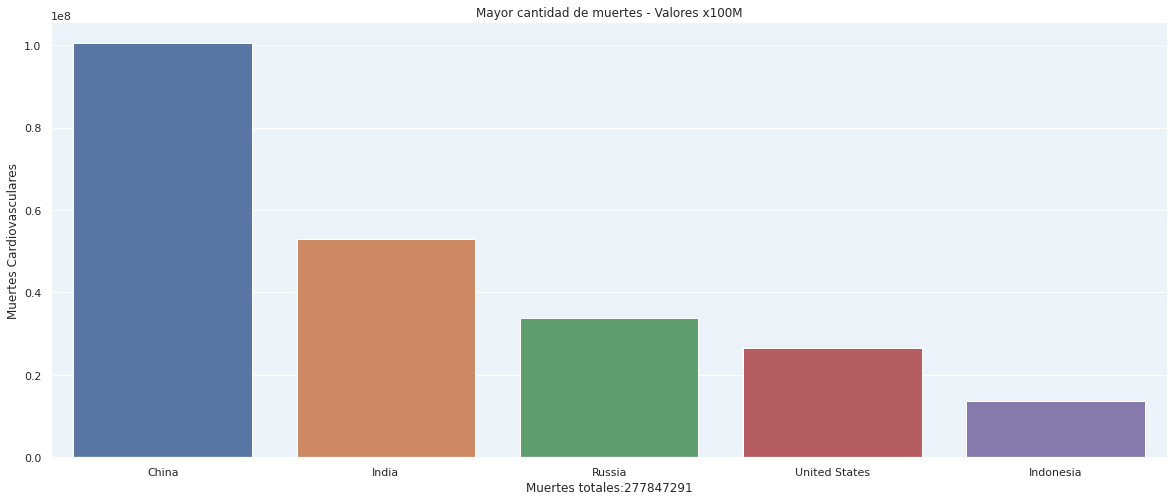

In [ ]:
#Grafico de barras
plt.subplots(figsize=(20,8))
snb.barplot(x=total_Deaths.index[:5], y=total_Deaths.values[:5])
plt.title('Mayor cantidad de muertes - Valores x100M')
plt.ylabel("Muertes Cardiovasculares")
plt.xlabel(f"Muertes totales:{total_Deaths.values.sum()}")



**Revisemos los numeros de la ultima decada.**

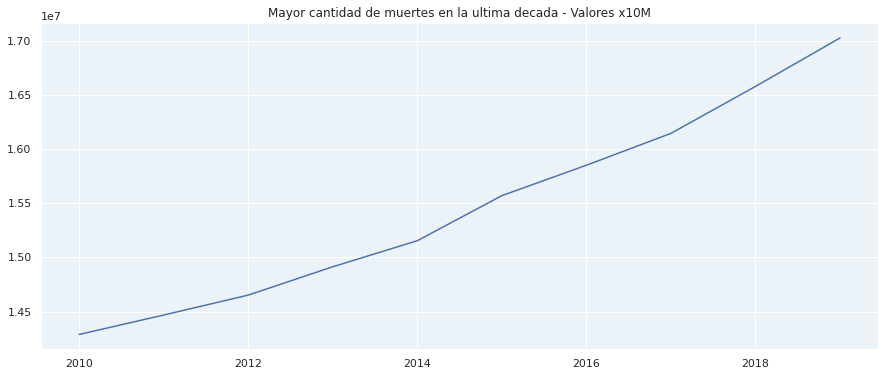

In [ ]:
#Repetimos el proceso que hicimos con el Grafico Pie
red_Year= data[data['Cardiovascular Diseases'] > 40000]
red_Year= red_Year.groupby('Year').sum('Cardiovascular Diseases')
total_Red_Year = red_Year['Cardiovascular Diseases'].sort_values(ascending=False)[:10]
#Creamos nuestro terreno
fig, ax = plt.subplots(figsize=(15,6))
y = total_Red_Year.values
x = total_Red_Year.index
#Creamos el grafico
ax.plot(x,y)
plt.title('Mayor cantidad de muertes en la ultima decada - Valores x10M')
plt.show()




el año 2019 tuvo un pico de al rededor de 17.000.000 de muertes debido a enfermedades Cardiovasculares.


# China

Ahora buscaremos el historial de muertes en China (pais con mas muertes registradas) durante los años.

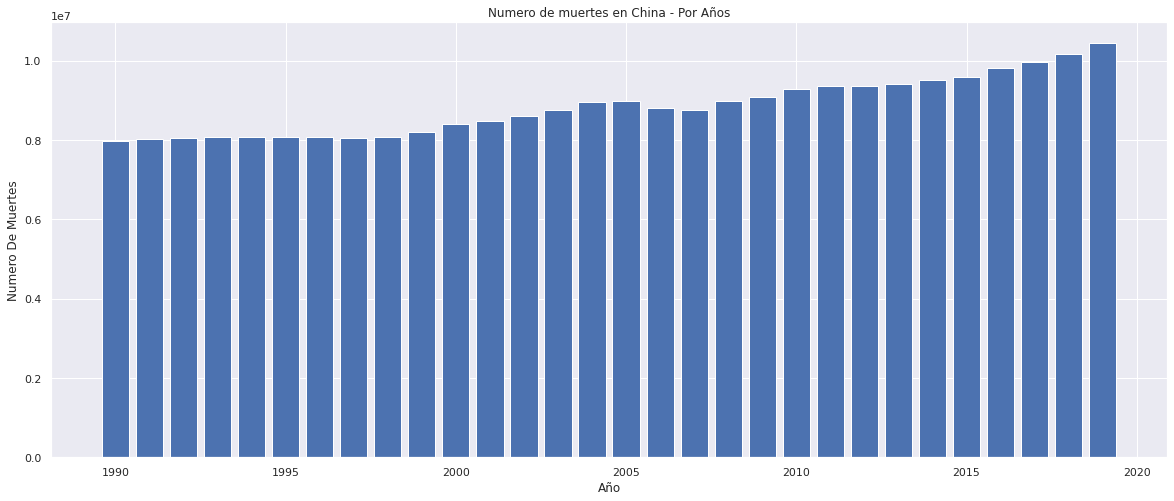

Year
1990     7964132
1991     8033487
1992     8059068
1993     8077792
1994     8070458
1995     8067172
1996     8079610
1997     8051031
1998     8082343
1999     8203474
2000     8404159
2001     8490928
2002     8610956
2003     8750361
2004     8960684
2005     8982702
2006     8794396
2007     8755201
2008     8972670
2009     9074833
2010     9284664
2011     9366974
2012     9364587
2013     9411928
2014     9503904
2015     9591222
2016     9814213
2017     9978653
2018    10163943
2019    10442561
Name: No. of Deaths, dtype: int64

In [ ]:
#Creamos un Df para el Grafico, en especifico un nueva columna llamada 'No. of Deaths'
No_of_Deaths_China = data[data['Country/Territory']=='China'].drop(['Country/Territory','Code'], axis=1).sort_values(by='Year', ascending=True)
No_of_Deaths_China = No_of_Deaths_China.set_index('Year')
No_of_Deaths_China['No. of Deaths'] = No_of_Deaths_China.sum(axis=1)

No_of_Deaths_China['No. of Deaths']

#Creamos el grafico
plt.subplots(figsize=(20,8))
snb.set(style='darkgrid')
plt.bar(No_of_Deaths_China.index, No_of_Deaths_China['No. of Deaths'])
plt.xlabel("Año")
plt.ylabel("Numero De Muertes")
plt.title("Numero de muertes en China - Por Años")
plt.show()

No_of_Deaths_China['No. of Deaths']



**¿Por que china tiene la mayor tasa de mortalidad en el mundo en cuanto a  enfermedades Cardiovasculares?**

* Una de las razones puede deberse a la gran cantidad de poblacion que reside 
dentro del mismo pais.
 Si revisamos el grafico "Pie" denotaremos que otro gran afectado es India, como a su vez tambien Japon, ambos con carateristicas de poblacion similiares.
 Al estar expuestos a tal sobrepoblacion estos mismos pueden generar una mayor cantidad de enfermos, por ende representar un gran porcentaje de la estadistica mundial.

* Segun la **World Heart Federation** en china uno de cada 5 adulto padecen de una (ECV) muchos factores, entre ellos:


1.   Gran parte de la poblacion es fumadora. (Siendo el mayor consumido y    productor de tabaco en el mundo)

2.   27.3% de la poblacion tiene hipertension.

3.   5.7% de la poblacion es obesa.

**Teniendo en cuenta esto, intentemos averiguar cual fue la mayor causa de muertes en los otros primeros 4 paises.**





# India

Meningitis            2008944
Alzheimer/Dementia    1707561
Parkinson              756832
dtype: object

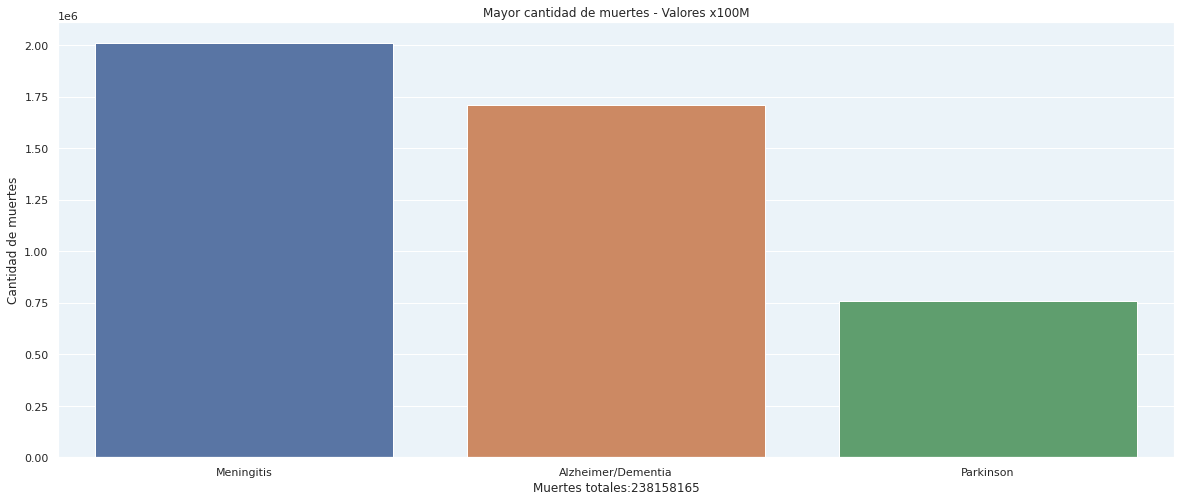

In [ ]:
#Filtramos data para graficar.
Filtrado = data.drop(['Code', 'Year'], axis=1).rename(columns={"Alzheimer's Disease and Other Dementias":'Alzheimer/Dementia',
                                   "Parkinson's Disease":'Parkinson'})
No_of_Deaths_india = Filtrado[Filtrado['Country/Territory']=='India'].sum().drop("Country/Territory")

#Grafiquemos
plt.subplots(figsize=(20,8)) 
snb.barplot(x=No_of_Deaths_india.index[:3], y=No_of_Deaths_india.values[:3])
plt.title('Mayor cantidad de muertes - Valores x100M')
plt.ylabel("Cantidad de muertes")
plt.xlabel(f"Muertes totales:{No_of_Deaths_india.values.sum()}")
No_of_Deaths_india[:3]

Como podemos observar, a diferencia de la otra gran super poblacion mundial, india no padece tanto las enfermedades cardio vasculares.

pero, **¿Que lleva a india a tener un indice tan alto de muertes por meningitis?**

India tiene una gran cantidad de casos de meningitis debido a varios factores, incluyendo **la falta de acceso a servicios de salud adecuados**, la falta de higiene y saneamiento, la presencia de enfermedades transmisibles y la falta de vacunación en la población. Además, l**as condiciones climáticas cálidas y húmedas en algunas partes de India favorecen la propagación de la enfermedad.** Es importante seguir medidas de prevención, como la vacunación, la higiene personal y el control de la transmisión de enfermedades para reducir la incidencia de meningitis en India.


Esto me lleva a preguntarme:


**¿Tambien las muertes aumentaran cada año?**

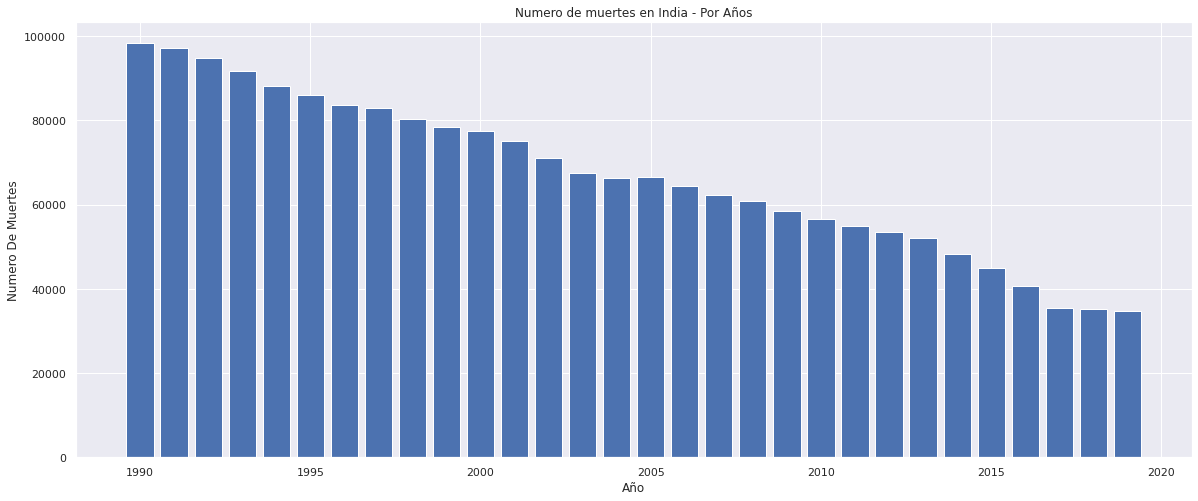

In [ ]:
#Definimos Bien los limites del DS
No_of_Deaths_India = data[data['Country/Territory']=='India'].drop(['Country/Territory','Code'], axis=1).sort_values(by='Year', ascending=True)
No_of_Deaths_India = No_of_Deaths_India.set_index('Year')

#Graficamos
plt.subplots(figsize=(20,8))
snb.set(style='darkgrid')
plt.bar(No_of_Deaths_India.index, No_of_Deaths_India['Meningitis'])
plt.xlabel("Año")
plt.ylabel("Numero De Muertes")
plt.title("Numero de muertes en India - Por Años")
plt.show()



**¡Sorprendetemente no!**

Las muertes por meningitis en India han disminuido a lo largo del tiempo debido a una combinación de factores, incluyendo:

*   **Mejoras en la atención médica**: La disponibilidad de tratamientos médicos y terapias más efectivas ha ayudado a reducir la tasa de mortalidad por meningitis.
*   **Campañas de vacunación**: La introducción de vacunas efectivas contra la meningitis ha reducido significativamente la incidencia de la enfermedad en India.

*   **Concientización pública**: La concientización sobre la importancia de la higiene personal y la prevención de la transmisión de enfermedades ha contribuido a la disminución de los casos de meningitis en el país.
*   **Mejoras en las condiciones de vida**: La mejora de las condiciones de vida y el acceso a servicios básicos de salud y saneamiento han ayudado a reducir la incidencia de la enfermedad.

En resumen, una combinación de factores, incluyendo mejoras en la atención médica, campañas de vacunación efectivas, concientización pública y mejoras en las condiciones de vida, han contribuido a la disminución de las muertes por meningitis en India.


#  Ideas para el desafio entregable "Estructurando un proyecto de DS-parte III"

> Intentar predecir la cantidad de muertes por Enfermedades Cardiovasculares en China el proximo año.


> Intentar predecir la cantidad de muertes por Meninguitis en India el proximo año.






In [ ]:
data.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
predict_china = data[['Country/Territory','Year','Cardiovascular Diseases']]
predict_china= predict_china[predict_china['Country/Territory']=='China']
predict_china

,Country/Territory,Year,Cardiovascular Diseases
1110,China,2007,3413237
1111,China,2008,3523450
1112,China,2009,3669964
1113,China,2010,3831636
1114,China,2011,3937801
1115,China,2012,3973790
1116,China,2013,4049045
1117,China,2014,4120839
1118,China,2015,4180060
1119,China,2016,4292981


In [ ]:
X_ent,X_test,y_ent,y_test = train_test_split(predict_china['Year'],predict_china['Cardiovascular Diseases'])

In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)

knn.fit(X_ent,y_ent)

ValueError: ignored